In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("testing_data.csv")
df

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W15,national,AT,Austria,1954,12339,8858775.0,139.285624,15.835967,Manual webscraping
1,Austria,AT,2020-W16,national,AT,Austria,773,58488,8858775.0,660.226724,1.321639,Manual webscraping
2,Austria,AT,2020-W17,national,AT,Austria,479,33443,8858775.0,377.512692,1.432288,Manual webscraping
3,Austria,AT,2020-W18,national,AT,Austria,349,26598,8858775.0,300.244673,1.312129,Country website
4,Austria,AT,2020-W19,national,AT,Austria,249,42153,8858775.0,475.833284,0.590705,Country website
...,...,...,...,...,...,...,...,...,...,...,...,...
3543,Sweden,SE,2020-W52,national,SE,Sweden,39076,232114,10230185.0,2268.913026,16.834831,TESSy
3544,Sweden,SE,2020-W53,national,SE,Sweden,41227,201011,10230185.0,1964.881378,20.509823,TESSy
3545,Sweden,SE,2021-W01,national,SE,Sweden,37132,207432,10230185.0,2027.646616,17.900806,TESSy
3546,Sweden,SE,2021-W02,national,SE,Sweden,26438,200844,10230185.0,1963.248954,13.163450,TESSy


In [20]:
df_2 = df.groupby('country').agg(sum)
df_2 = df_2.reset_index()

<AxesSubplot:xlabel='country'>

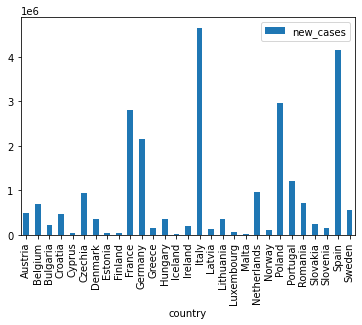

In [24]:
df_2.plot.bar(x = 'country', y = 'new_cases') #Italy > Spain > France

In [25]:
df.describe()

,new_cases,tests_done,population,testing_rate,positivity_rate
count,3548.000000,3.548000e+03,3.548000e+03,3548.000000,3545.000000
mean,7075.904735,8.261381e+04,7.044817e+06,1991.974717,7.666159
std,21723.667517,1.999866e+05,1.478764e+07,3201.697043,10.545157
min,0.000000,1.000000e+00,8.468900e+04,0.010302,0.000000
25%,102.750000,7.012500e+03,6.810710e+05,431.741020,1.108160
50%,960.500000,2.058650e+04,2.080908e+06,1121.506437,3.799896
75%,4420.000000,7.032800e+04,5.517919e+06,2168.338807,10.652383
max,373409.000000,3.028311e+06,8.301921e+07,35019.868360,165.655959


In [26]:
df.get('country').unique() #no India, USA, Brazil

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'],
      dtype=object)

<AxesSubplot:xlabel='country'>

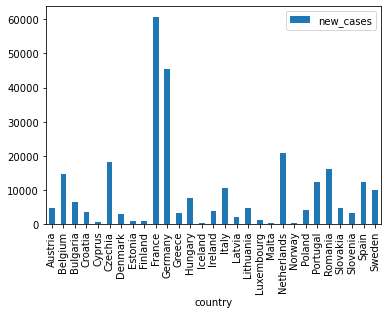

In [28]:
df_3 = df.groupby('country').mean()
df_3 = df_3.reset_index()
df_3.plot.bar(x = 'country', y = 'new_cases') #France > Germany

In [31]:
df.dtypes

country                 object
country_code            object
year_week               object
level                   object
region                  object
region_name             object
new_cases                int64
tests_done               int64
population             float64
testing_rate           float64
positivity_rate        float64
testing_data_source     object
dtype: object

<AxesSubplot:xlabel='country'>

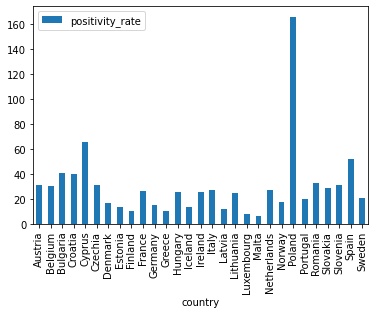

In [32]:
df_4 = df.groupby('country').max(numeric_only = True)
df_4 = df_4.reset_index()
df_4.plot.bar(x = 'country', y = 'positivity_rate')

<AxesSubplot:xlabel='country'>

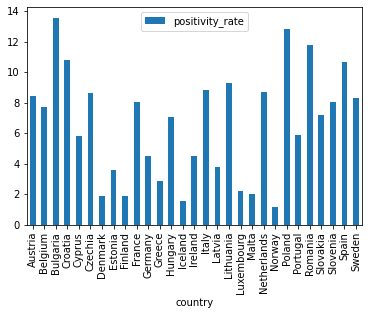

In [33]:
df_5 = df.groupby('country').mean()
df_5 = df_5.reset_index()
df_5.plot.bar(x = 'country', y = 'positivity_rate')

In [34]:
df = df.assign(prop_cases = df.get('new_cases')/df.get('population'))
df

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source,prop_cases
0,Austria,AT,2020-W15,national,AT,Austria,1954,12339,8858775.0,139.285624,15.835967,Manual webscraping,0.000221
1,Austria,AT,2020-W16,national,AT,Austria,773,58488,8858775.0,660.226724,1.321639,Manual webscraping,0.000087
2,Austria,AT,2020-W17,national,AT,Austria,479,33443,8858775.0,377.512692,1.432288,Manual webscraping,0.000054
3,Austria,AT,2020-W18,national,AT,Austria,349,26598,8858775.0,300.244673,1.312129,Country website,0.000039
4,Austria,AT,2020-W19,national,AT,Austria,249,42153,8858775.0,475.833284,0.590705,Country website,0.000028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,Sweden,SE,2020-W52,national,SE,Sweden,39076,232114,10230185.0,2268.913026,16.834831,TESSy,0.003820
3544,Sweden,SE,2020-W53,national,SE,Sweden,41227,201011,10230185.0,1964.881378,20.509823,TESSy,0.004030
3545,Sweden,SE,2021-W01,national,SE,Sweden,37132,207432,10230185.0,2027.646616,17.900806,TESSy,0.003630
3546,Sweden,SE,2021-W02,national,SE,Sweden,26438,200844,10230185.0,1963.248954,13.163450,TESSy,0.002584


<AxesSubplot:xlabel='country'>

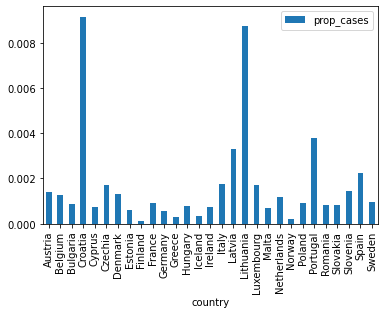

In [35]:
df_6 = df.groupby('country').mean()
df_6 = df_6.reset_index()
df_6.plot.bar(x = 'country', y = 'prop_cases')

In [46]:
df.isna().any()

country                False
country_code           False
year_week              False
level                  False
region                 False
region_name            False
new_cases              False
tests_done             False
population             False
testing_rate           False
positivity_rate         True
testing_data_source     True
prop_cases             False
dtype: bool

In [48]:
df_7 = df.fillna(0)

In [49]:
df_7.isna().any()

country                False
country_code           False
year_week              False
level                  False
region                 False
region_name            False
new_cases              False
tests_done             False
population             False
testing_rate           False
positivity_rate        False
testing_data_source    False
prop_cases             False
dtype: bool

<AxesSubplot:xlabel='year_week'>

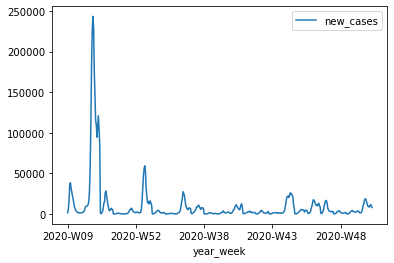

In [50]:
df_8 = df[df.get('country') == 'Italy']
df_8.plot(x = 'year_week', y = 'new_cases')

C:\Users\Gauri\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


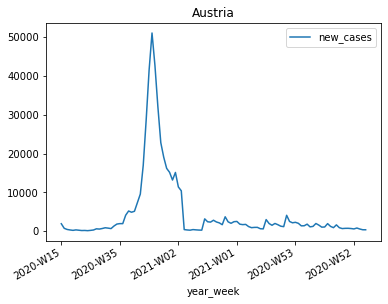

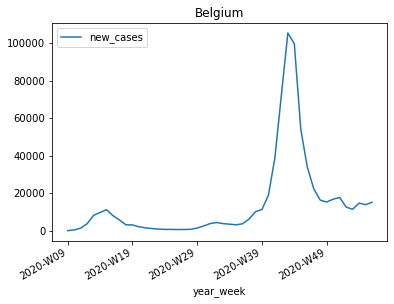

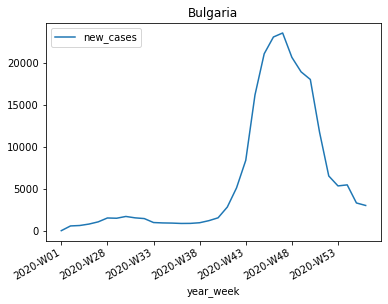

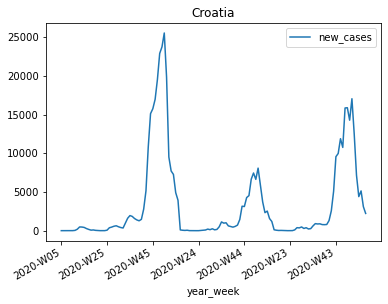

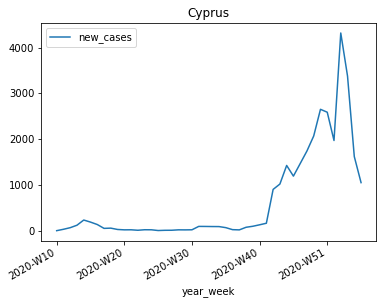

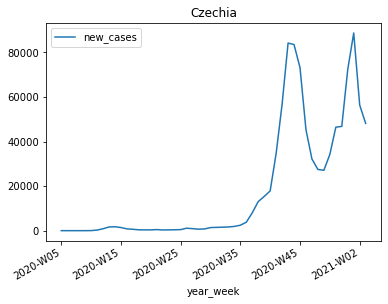

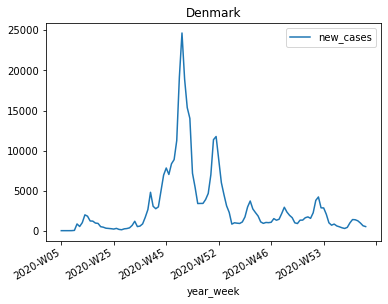

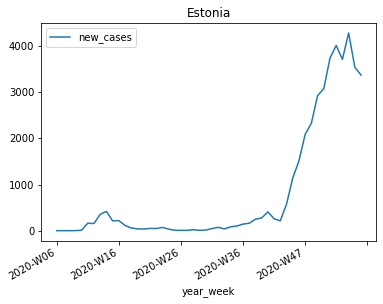

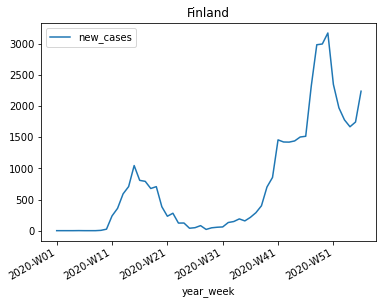

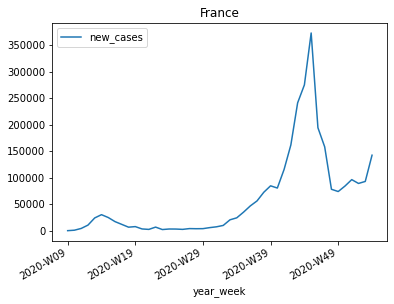

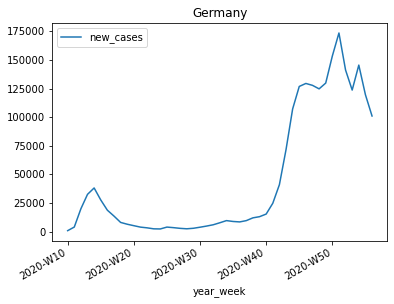

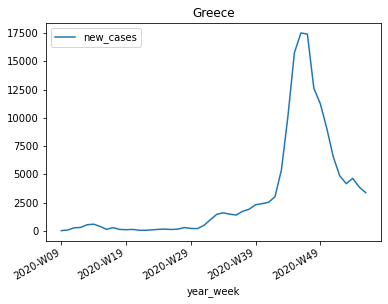

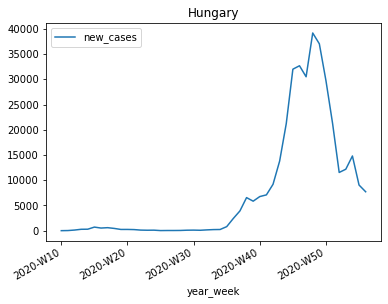

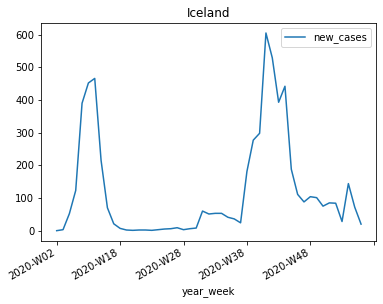

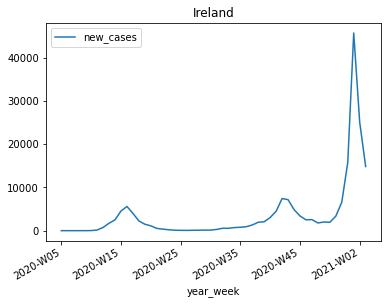

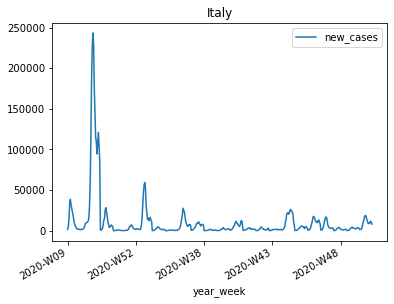

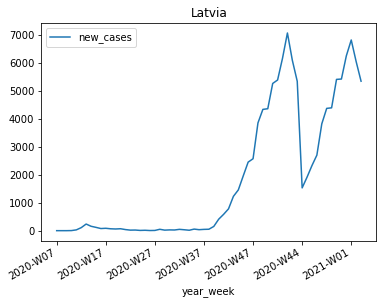

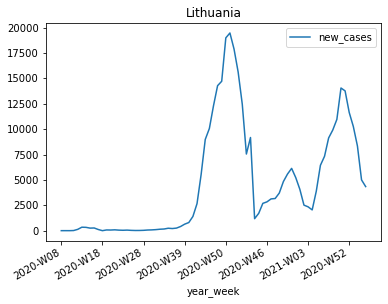

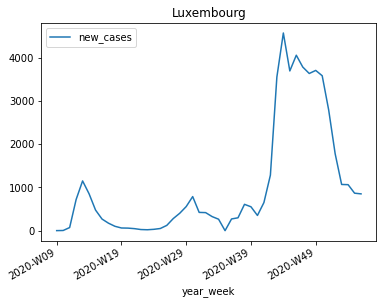

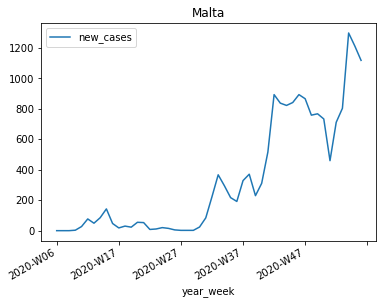

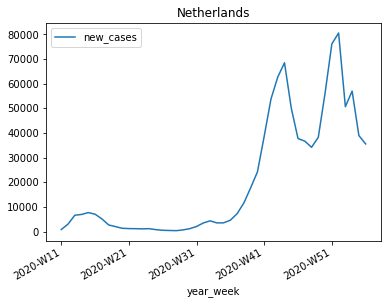

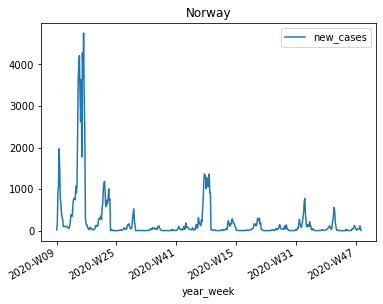

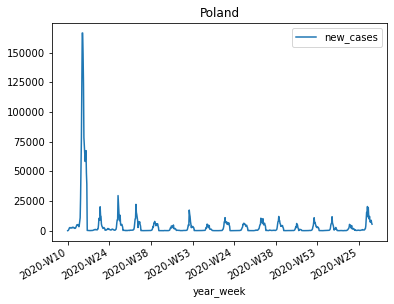

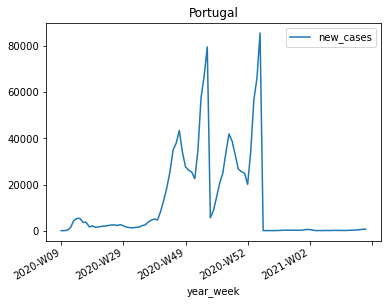

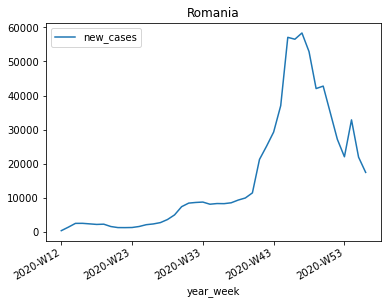

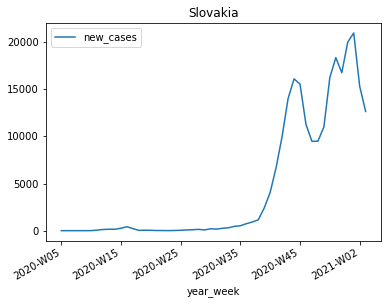

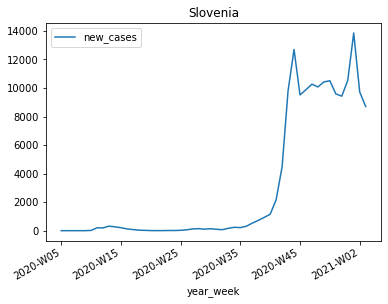

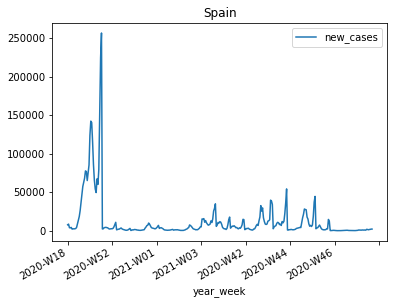

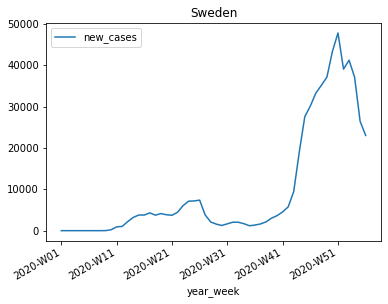

In [57]:
countries = df.get('country').unique()
for country in countries:
    df_temp = df[df.get('country') == country]
    ax = df_temp.plot(x = 'year_week', y = 'new_cases', title = country)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')